In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# Cost for PV system per square meter
dollar_per_watt = 4
efficiency_earth = 1250 # Watt per square meter on earth
area_ratio = 0.0923     # The ratio between area in mirror space illuminating area on the ground
efficiency_PV = 0.20    # The efficiency of PV cell

def cost_PV(dollar_per_watt, efficiency_earth, area_ratio, efficiency_PV):
  efficiency_space = efficiency_earth * area_ratio * efficiency_PV
  cost = dollar_per_watt * efficiency_space
  return cost, efficiency_space

cost_PV, efficiency_space = cost_PV(dollar_per_watt, efficiency_earth, area_ratio, efficiency_PV)
print(str(cost_PV) + "$/m^2")

92.3$/m^2


In [80]:
# Cost for solar mirrors per square meter
construction = 2.11 *0.9  # according to NASA
transportation = 70   # spaceX reusable Falcon 2
maintainance = 1.27 *0.9  # discounted by 40 years period

cost_MIRROR = construction + transportation + maintainance
print(str(cost_MIRROR) + "$/m^2")

73.042$/m^2


In [81]:
# Revenue
price = 0.18     # the electricity price for Alaska in dollar/kWh
hours = 365*24    # number of hours in a year
efficiency_space  # calculated from the PV cost section 

def revenue(price, efficiency_space, hours):
  total_electricity = efficiency_space * hours * 10e-4
  money = total_electricity * price
  return money

revenue = revenue(price, efficiency_space, hours)
print(str(revenue) + "$/m^2")

36.38466$/m^2


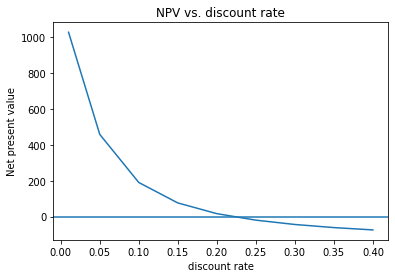

In [82]:
# net present value 
period = 40
discount_rate = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
cost = cost_MIRROR + cost_PV
def NPV(period, discount_rate, revenue, cost):
  out = []
  for i in discount_rate:
    temp = 0
    for j in range(period):
      temp += revenue/(1+i)**(j+1)
    out.append(temp - cost)
  return out 
NPV_result = NPV(period, discount_rate, revenue, cost)
plt.plot(discount_rate, NPV_result)
plt.axhline(y=0, xmin=0, xmax=1)
plt.title("NPV vs. discount rate")
plt.xlabel("discount rate")
plt.ylabel("Net present value")
plt.show()